In [1]:
!pip install segmentation_models==1.0.1 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.8 MB/s eta 0:00:00


In [ ]:
!unzip /content/drive/MyDrive/stage1_train.zip -d bowl2018

In [ ]:
!unzip /content/drive/MyDrive/stage1_test.zip -d bowl2018test

In [5]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from skimage.io import imread,imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from zipfile import ZipFile
from utils import create_train_val_datasets
from DeeplabV3Plus import DeeplabV3Plus
import segmentation_models as sm
import seaborn as sns

Segmentation Models: using `tf.keras` framework.


In [6]:
# Call the function to get the datasets
train_dataset, val_dataset = create_train_val_datasets("bowl2018", test_size=0.2, batch_size=8)

# Print some information about the datasets
print("Number of training samples:", len(train_dataset))
print("Number of validation samples:", len(val_dataset))
print("Number of batches in train_dataset:", len(list(train_dataset)))
print("Number of batches in val_dataset:", len(list(val_dataset)))

Number of training samples: 67
Number of validation samples: 17
Number of batches in train_dataset: 67
Number of batches in val_dataset: 17


In [7]:
from keras.callbacks import Callback, ModelCheckpoint

In [8]:
model1 = DeeplabV3Plus(image_size=256, num_classes=1,backbone="densenet121")
model1.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss= sm.losses.DiceLoss() ,metrics= [sm.metrics.FScore(),sm.metrics.IOUScore(threshold=0.5)])

checkpoint1 = ModelCheckpoint(
    'densenet121.h5',
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    mode='auto'
)

history1 = model1.fit(train_dataset,
    validation_data=val_dataset,
    verbose=0,
    callbacks=[checkpoint1],
    epochs=50
)

29084464/29084464 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


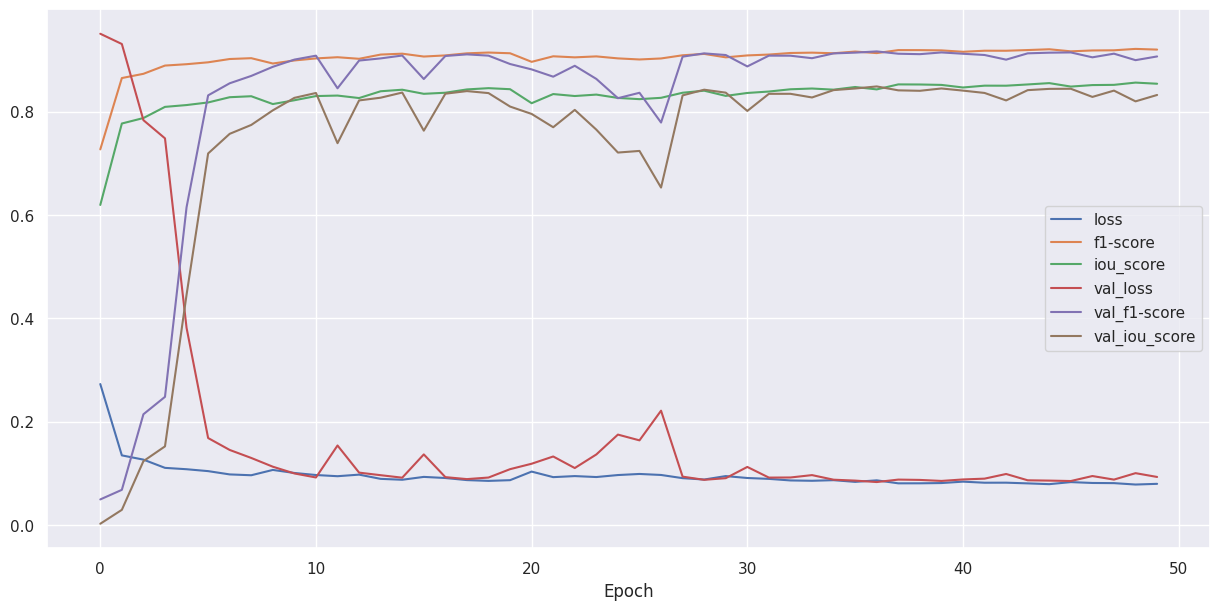

In [9]:
sns.set_theme()
pd.DataFrame(history1.history).plot(figsize=(15, 7))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

In [13]:
from utils import create_test_dataset
test_images=create_test_dataset("/content/bowl2018test")

3/3 [==============================] - 3s 264ms/step


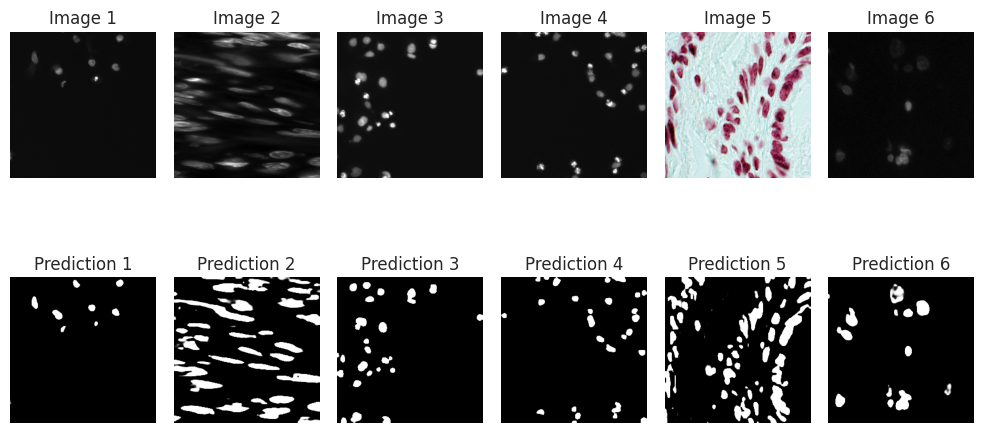

In [14]:
from utils import predict_and_plot
model_resnet101v2 = DeeplabV3Plus(image_size=256, num_classes=1, backbone="densenet121")

predict_and_plot(model_resnet101v2, "densenet121.h5", test_images, 6)